In [12]:
from google.colab import files

uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df= pd.read_csv("Fraud_check.csv")
df.shape

(600, 6)

In [16]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [17]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [19]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [20]:
df[df.duplicated()].shape

(0, 6)

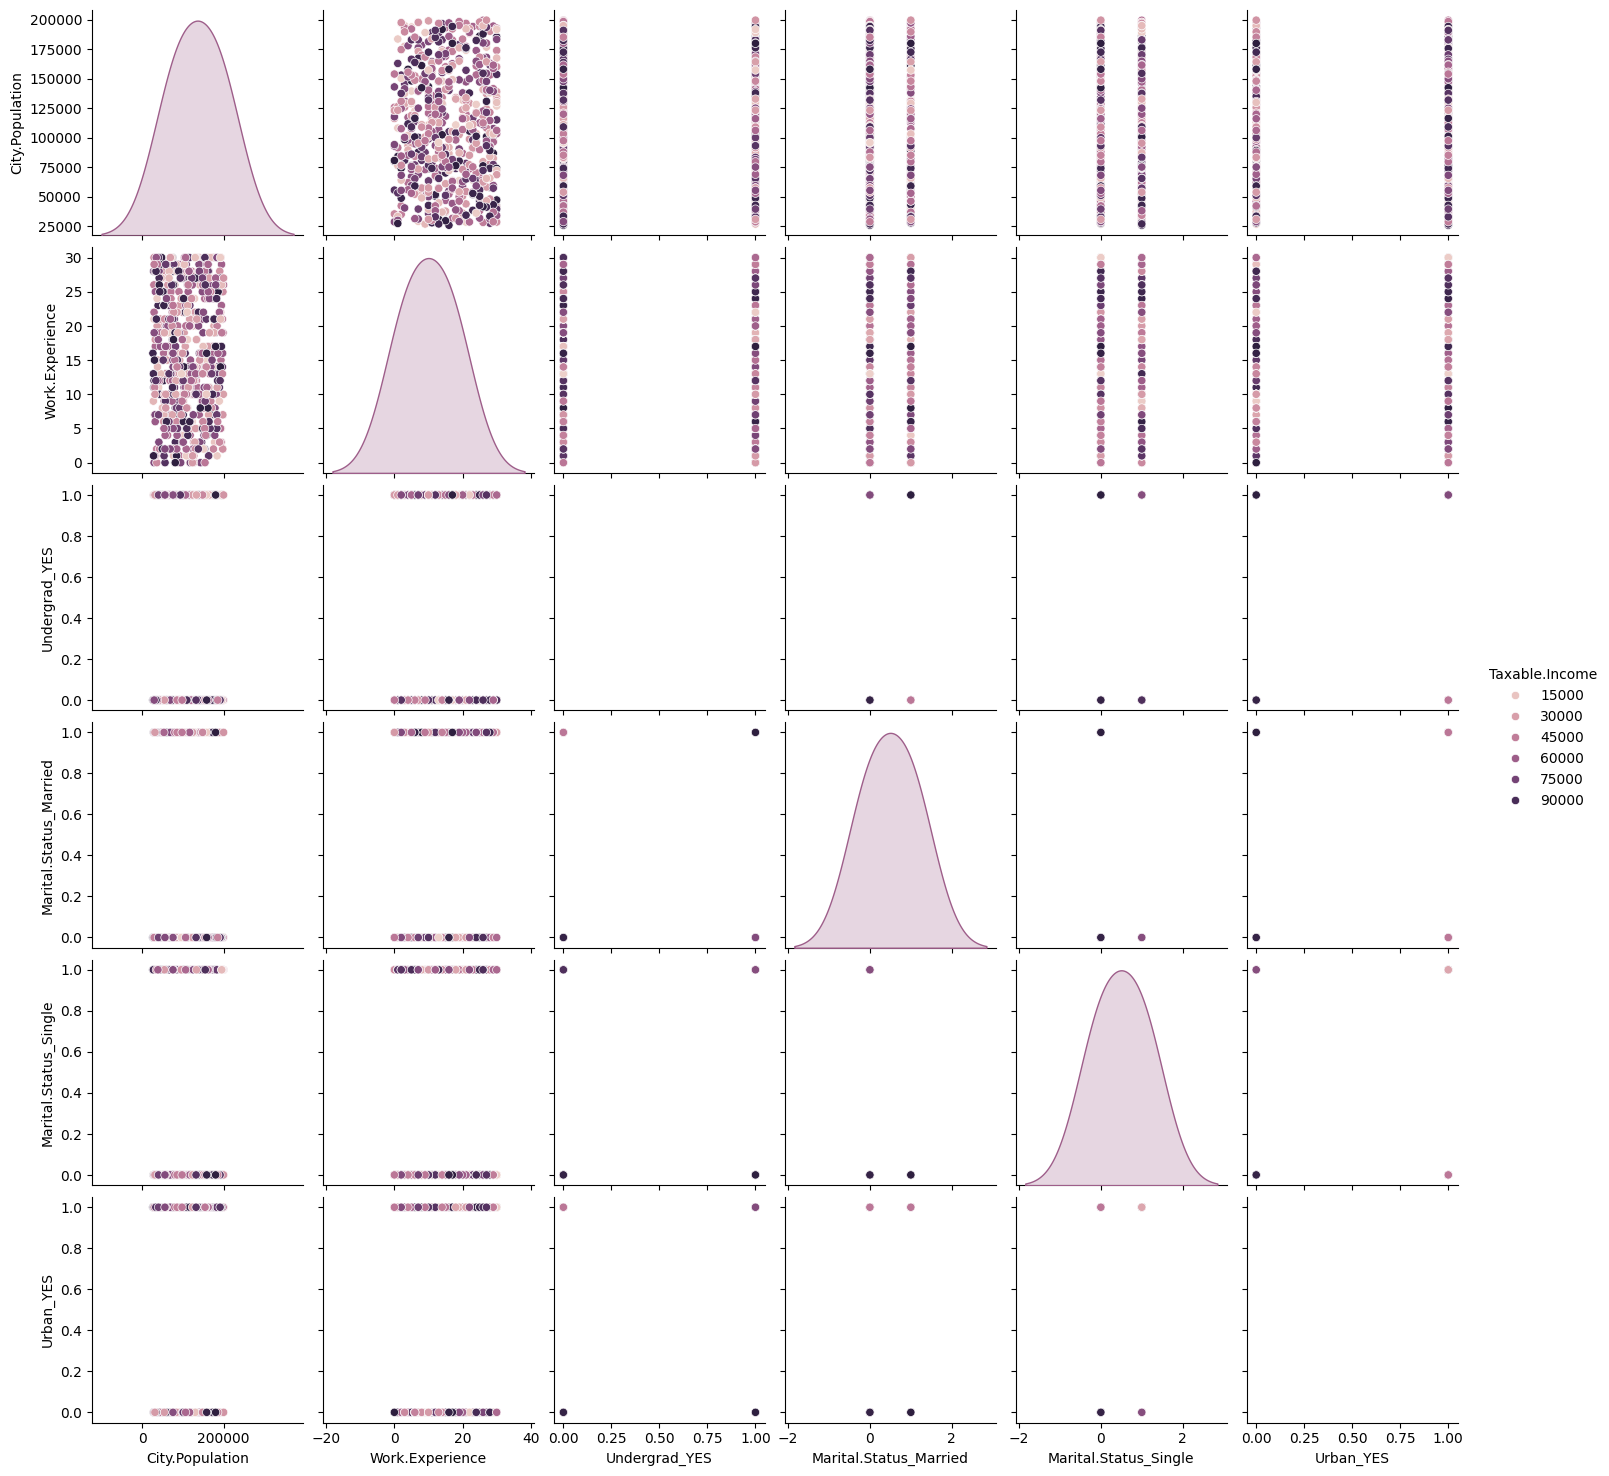

In [22]:
sns.pairplot(df, hue="Taxable.Income" )

In [28]:
# Creating target variable

df["Tax_income"]= df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_income
0,68833,50047,10,False,False,True,True,Good
1,33700,134075,18,True,False,False,True,Good
2,36925,160205,30,False,True,False,True,Good
3,50190,193264,15,True,False,True,True,Good
4,81002,27533,28,False,True,False,False,Good


In [31]:
df.drop("Taxable.Income", axis= 1, inplace= True)
df.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_income
0,50047,10,False,False,True,True,Good
1,134075,18,True,False,False,True,Good
2,160205,30,False,True,False,True,Good
3,193264,15,True,False,True,True,Good
4,27533,28,False,True,False,False,Good


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   City.Population         600 non-null    int64 
 1   Work.Experience         600 non-null    int64 
 2   Undergrad_YES           600 non-null    bool  
 3   Marital.Status_Married  600 non-null    bool  
 4   Marital.Status_Single   600 non-null    bool  
 5   Urban_YES               600 non-null    bool  
 6   Tax_income              600 non-null    object
dtypes: bool(4), int64(2), object(1)
memory usage: 16.5+ KB


In [37]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

for i in df.columns:
  if df[i].dtype== "bool" or df[i].dtype== "object":
    df[i]= LE.fit_transform(df[i])

In [38]:
df.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_income
0,50047,10,0,0,1,1,0
1,134075,18,1,0,0,1,0
2,160205,30,0,1,0,1,0
3,193264,15,1,0,1,1,0
4,27533,28,0,1,0,0,0


In [40]:
y= df["Tax_income"]

x= df.drop("Tax_income", axis=1)
x.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [41]:
# Data partition

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30)

In [46]:
# Model fitting

from sklearn.tree import DecisionTreeClassifier

dt_model= DecisionTreeClassifier(criterion= "gini")
dt_model.fit(x_train, y_train)
y_pred_train= dt_model.predict(x_train)
y_pred_test= dt_model.predict(x_test)

from sklearn.metrics import accuracy_score

training_score= accuracy_score(y_train, y_pred_train)
testing_score= accuracy_score(y_test, y_pred_test)

print("Accuracy score of train:", training_score.round(2))
print("Accuracy score of test:", testing_score.round(2))

Accuracy score of train: 1.0
Accuracy score of test: 0.67


In [47]:
# Cross validation

training_score=[]
testing_score=[]

for i in range(1,101):
  x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=i)
  dt_model= DecisionTreeClassifier(criterion= "gini")
  dt_model.fit(x_train, y_train)
  y_pred_train= dt_model.predict(x_train)
  y_pred_test= dt_model.predict(x_test)
  training_score.append(accuracy_score(y_train, y_pred_train))
  testing_score.append(accuracy_score(y_test, y_pred_test))
print("Accuracy score of train:", np.mean(training_score).round(2))
print("Accuracy score of test:", np.mean(testing_score).round(2))

Accuracy score of train: 1.0
Accuracy score of test: 0.64


In [57]:
# Cross validation

training_score=[]
testing_score=[]

for i in range(1,101):
  x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=i)
  dt_model= DecisionTreeClassifier(criterion= "entropy")
  dt_model.fit(x_train, y_train)
  y_pred_train= dt_model.predict(x_train)
  y_pred_test= dt_model.predict(x_test)
  training_score.append(accuracy_score(y_train, y_pred_train))
  testing_score.append(accuracy_score(y_test, y_pred_test))
print("Accuracy score of train:", np.mean(training_score).round(2))
print("Accuracy score of test:", np.mean(testing_score).round(2))

Accuracy score of train: 1.0
Accuracy score of test: 0.65


In [55]:
print("The number of nodes in the tree is:",dt_model.tree_.node_count)
print("The depth of the tree is:",dt_model.tree_.max_depth)

The number of nodes in the tree is: 239
The depth of the tree is: 20


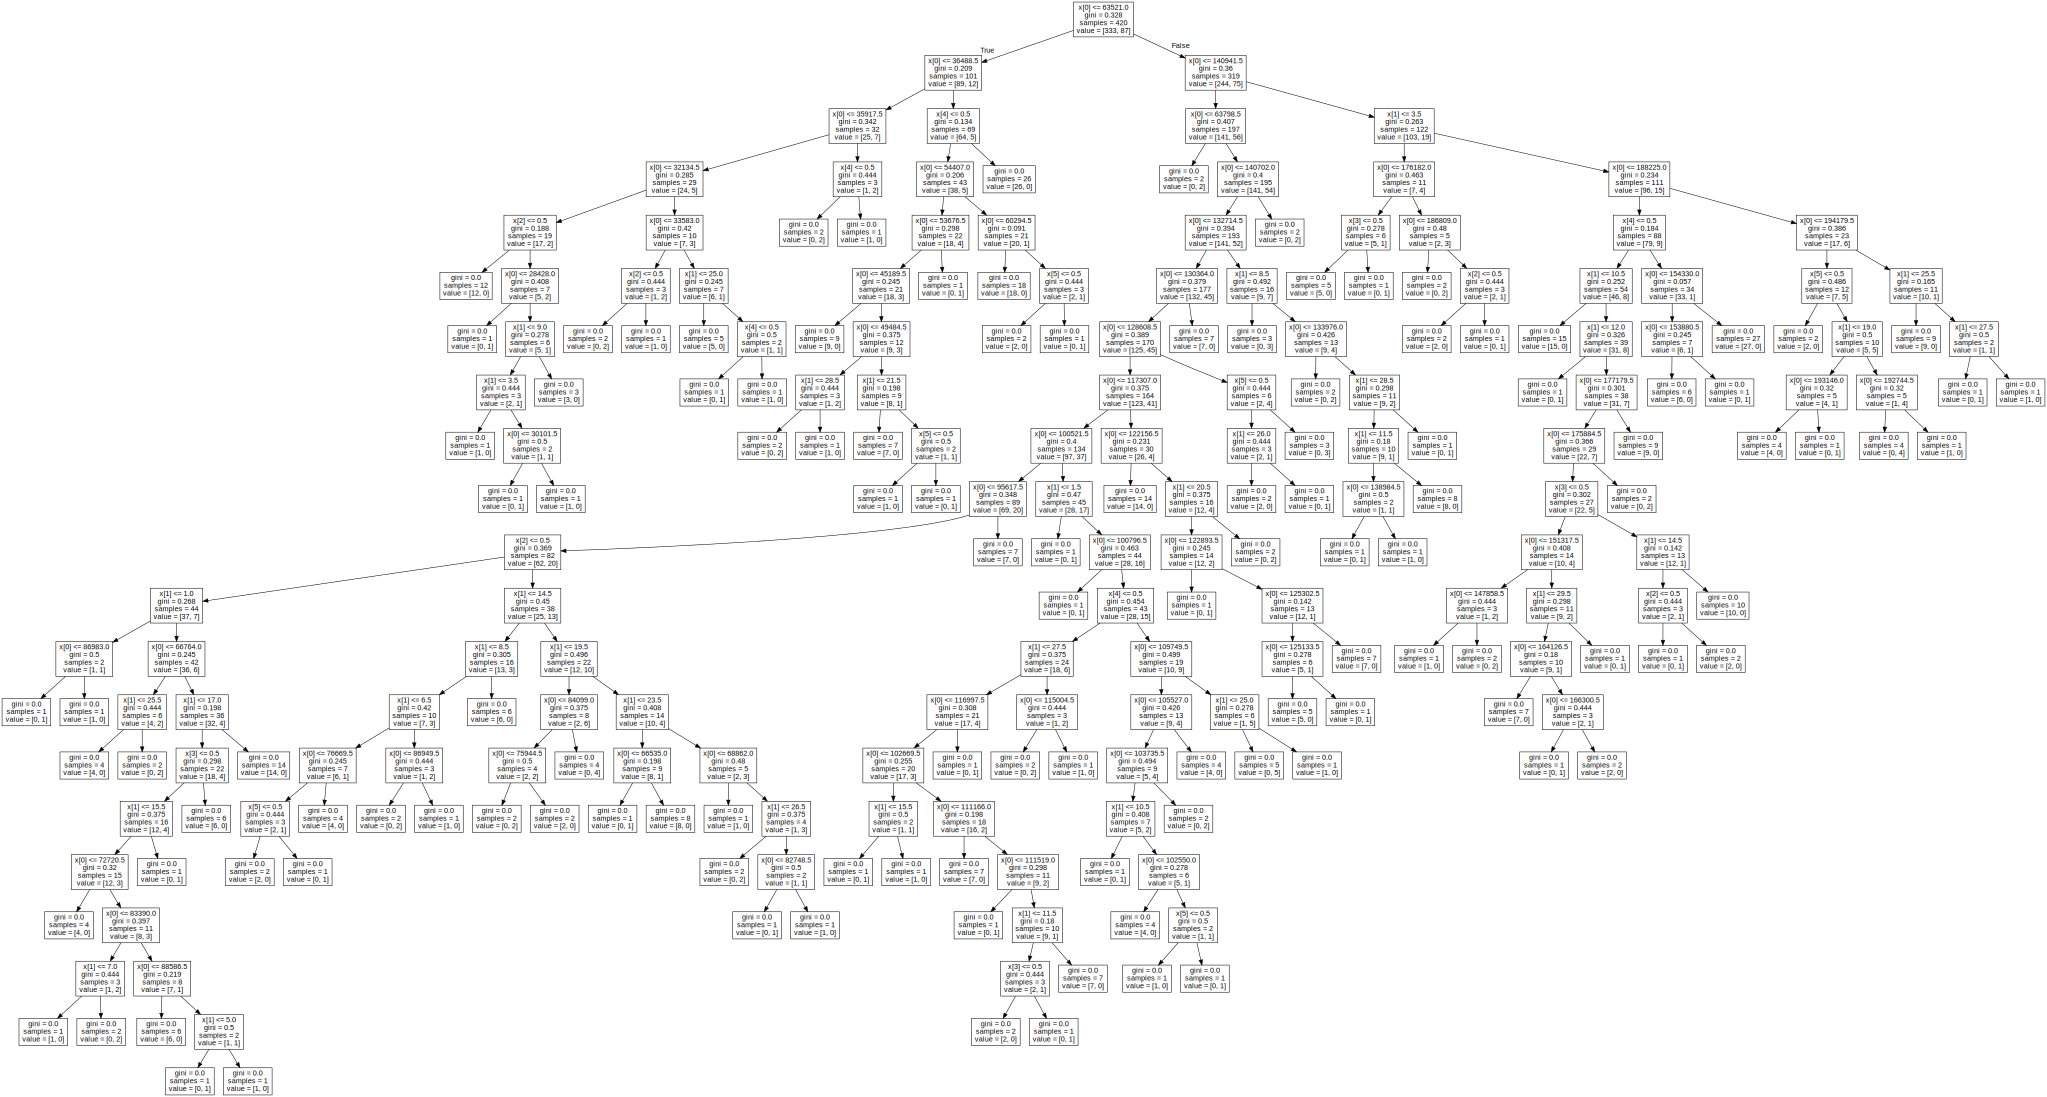

In [56]:
from sklearn.tree import export_graphviz
import graphviz

dot_data= export_graphviz(dt_model, out_file=None)
graph= graphviz.Source(dot_data)
graph

In [48]:
# Bagging Classifier

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.30)

from sklearn.ensemble import BaggingClassifier

bag_clf= BaggingClassifier(n_estimators= 100,
                          max_features= 0.7,
                          max_samples=0.6)

bag_clf.fit(x_train,y_train)
y_pred_train= bag_clf.predict(x_train)
y_pred_test= bag_clf.predict(x_test)

training_score= accuracy_score(y_train, y_pred_train)
testing_score= accuracy_score(y_test, y_pred_test)

print("RMSE of train:",(training_score).round(2))
print("RMSE of test:",(testing_score).round(2))

RMSE of train: 0.92
RMSE of test: 0.8


In [50]:
# Cross validation for  Bagging Classifier

training_score=[]
testing_score=[]

for i in range(1,101):
  x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=i)
  bag_clf= BaggingClassifier(n_estimators= 200,
                          max_features= 0.7,
                          max_samples=0.6)
  bag_clf.fit(x_train,y_train)
  y_pred_train= bag_clf.predict(x_train)
  y_pred_test= bag_clf.predict(x_test)
  training_score.append(accuracy_score(y_train, y_pred_train))
  testing_score.append(accuracy_score(y_test, y_pred_test))
print("Accuracy score of train:", np.mean(training_score).round(2))
print("Accuracy score of test:", np.mean(testing_score).round(2))

Accuracy score of train: 0.9
Accuracy score of test: 0.78
